In [306]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [307]:
df = pd.read_csv('data_encoded.csv')
df.head()

,age,height_cm,weight_kgs,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,...,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,nationality_encoded,overall_rating
0,19,180.006271,68.0,1,3,2,45,44,42,60,...,1,0,0,0,1,0,0,0,66.150183,56
1,31,182.880000,73.9,0,3,3,41,74,73,59,...,0,0,0,0,0,0,0,1,71.063492,73
2,25,190.500000,84.8,1,3,2,49,28,57,51,...,0,0,0,1,0,0,0,0,60.972656,57
3,23,190.500000,86.2,1,3,2,36,21,74,54,...,0,0,0,0,0,0,0,0,68.625990,68
4,32,182.880000,79.8,1,3,2,35,22,66,54,...,0,0,0,0,0,0,0,0,62.604082,72


In [308]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [310]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12562, 52) (5385, 52)
(12562,) (5385,)


In [311]:
X_train

,age,height_cm,weight_kgs,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,short_passing,...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,nationality_encoded
4457,25,181.348094,72.1,0,4,2,63,59,51,66,...,1,1,0,0,0,0,0,0,0,60.493392
15709,28,182.880000,82.1,1,3,3,67,69,48,75,...,0,0,0,0,0,0,0,0,0,62.604082
4429,25,187.960000,82.1,1,3,1,15,8,11,23,...,0,0,0,0,0,0,0,0,0,71.289796
13088,23,187.960000,69.9,1,3,2,28,23,61,52,...,0,0,0,0,0,0,0,0,0,65.000000
15208,25,181.920812,78.9,1,4,2,54,64,61,59,...,0,0,0,0,0,0,0,0,1,64.501308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,24,175.260000,64.0,1,3,2,54,34,67,69,...,1,0,0,0,0,0,0,0,0,66.489899
11964,28,182.758127,68.0,1,2,2,51,22,56,64,...,0,0,0,0,0,0,0,0,0,63.019737
5390,21,182.880000,71.2,1,2,2,31,65,61,52,...,0,0,0,0,0,0,0,0,1,64.392996
860,30,175.260000,63.0,1,3,2,30,18,46,31,...,0,0,0,0,0,0,0,0,0,60.493392


In [312]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [313]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512)
        )
        self.layer5 = nn.Sequential(
            nn.Linear(512, 1)
        )
        # self.initialize_weights()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x
    
    # def initialize_weights(self):
    #     for m in self.modules():
    #         if isinstance(m, nn.Linear):
    #             nn.init.kaiming_normal_(m.weight)
    #             if m.bias is not None:
    #                 nn.init.zeros_(m.bias)

In [314]:
input_dim = X_train.shape[1]
print('Input dimension:', input_dim)

model = MLPRegressor(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Input dimension: 52


In [315]:
import torchsummary
torchsummary.summary(model, (input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           6,784
              ReLU-2                  [-1, 128]               0
       BatchNorm1d-3                  [-1, 128]             256
            Linear-4                  [-1, 256]          33,024
              ReLU-5                  [-1, 256]               0
       BatchNorm1d-6                  [-1, 256]             512
            Linear-7                  [-1, 256]          65,792
              ReLU-8                  [-1, 256]               0
       BatchNorm1d-9                  [-1, 256]             512
           Linear-10                  [-1, 512]         131,584
             ReLU-11                  [-1, 512]               0
      BatchNorm1d-12                  [-1, 512]           1,024
           Linear-13                    [-1, 1]             513
Total params: 240,001
Trainable params:

In [316]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [317]:
epochs = 151
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()

    y_train_pred = model(X_train_tensor)
    train_loss = criterion(y_train_pred, y_train_tensor)

    train_loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test_tensor)
            train_losses.append(train_loss.item())
            test_loss = criterion(y_test_pred, y_test_tensor)
            test_losses.append(test_loss.item())
        print(f'Epoch [{epoch}/150], Train Loss: {train_loss.item()}, Test Loss: {test_loss.item()}')

Epoch [0/150], Train Loss: 4448.2958984375, Test Loss: 4394.21875
Epoch [10/150], Train Loss: 4112.4453125, Test Loss: 2784.490478515625
Epoch [20/150], Train Loss: 2700.432373046875, Test Loss: 1797.4295654296875
Epoch [30/150], Train Loss: 629.16650390625, Test Loss: 322.96563720703125
Epoch [40/150], Train Loss: 69.64053344726562, Test Loss: 174.4696807861328
Epoch [50/150], Train Loss: 101.43524169921875, Test Loss: 103.77093505859375
Epoch [60/150], Train Loss: 13.00556755065918, Test Loss: 13.18973159790039
Epoch [70/150], Train Loss: 16.78365135192871, Test Loss: 11.799654960632324
Epoch [80/150], Train Loss: 4.326399326324463, Test Loss: 5.653507232666016
Epoch [90/150], Train Loss: 4.198744773864746, Test Loss: 4.074678421020508
Epoch [100/150], Train Loss: 3.1856727600097656, Test Loss: 3.5909981727600098
Epoch [110/150], Train Loss: 2.740527868270874, Test Loss: 3.047865152359009
Epoch [120/150], Train Loss: 2.7241220474243164, Test Loss: 3.1429412364959717
Epoch [130/150], 

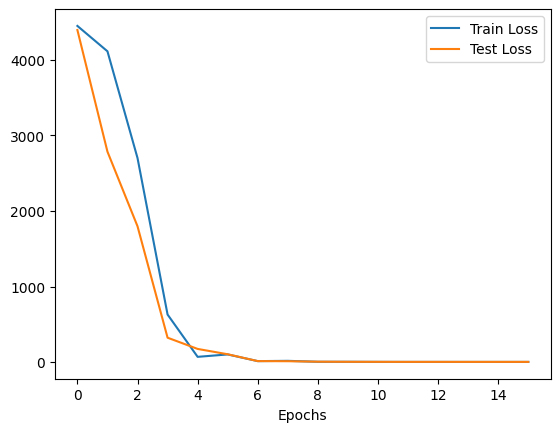

In [318]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [319]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

model.eval()
y_pred = model(X_test_tensor)
test_loss = criterion(y_pred, y_test_tensor)
print(f'Test Loss: {test_loss.item()}')

Test Loss: 2.920332908630371


In [329]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_np = y_pred.detach().numpy()
y_test_np = y_test_tensor.numpy()

# print(y_pred_np.shape)
# print(y_test_np.shape)

print('Test Set:')
r2 = r2_score(y_test_np, y_pred_np)
print(f'R² Score: {r2}')

mse = mean_squared_error(y_test_np, y_pred_np)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test_np, y_pred_np)
print(f'Mean Absolute Error: {mae}')

Test Set:
R² Score: 0.9383926391601562
Mean Squared Error: 2.920332908630371
Mean Absolute Error: 0.9617182016372681


In [337]:
comparison_df = pd.DataFrame({
    'Actual': y_test_np.flatten(),
    'Predicted': y_pred_np.flatten()
})

comparison_df.head(10)

,Actual,Predicted
0,64.0,63.341965
1,83.0,82.572525
2,59.0,59.409245
3,63.0,62.776138
4,58.0,58.414360
5,74.0,72.865082
6,68.0,68.224983
7,75.0,74.767975
8,70.0,70.017677
9,57.0,57.810513
